In [1]:
#transformation box_cox
import pandas as pd
train=pd.read_csv("train_new.csv")
train.shape

(15120, 54)

In [31]:
#box cox transformation
from scipy.stats import boxcox
import numpy as np
features_bc = []
feat=list(train.ix[:,1:11].columns)
del feat[4]
feat
#dropping vertical_distance_to_hydrology as it has negative values and it doesnt look like an important feature
for feature in feat:
    bc_transformed, _ = boxcox(train[feature]+1)  # shift by 1 to avoid computing log of negative values
    features_bc.append(bc_transformed)
features_boxcox = np.column_stack(features_bc)
train_bc = pd.DataFrame(data=features_boxcox, columns=feat)
train_bc.head()
n_train=pd.read_csv("ntrain.csv")
train_boxcox=pd.concat([train_bc,n_train],axis=1)
train_boxcox.head()



,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,101.251610,11.391468,1.982917,19.776085,14.878703,8.911152e+07,7.705315e+08,301.766934,29.452994,1,29,5
1,101.131754,11.983506,1.454389,18.138371,13.665600,8.766436e+07,8.110778e+08,308.929988,29.383926,1,29,5
2,105.324621,19.336298,4.259428,20.108048,25.711934,1.095384e+08,8.532048e+08,271.021396,29.249611,1,12,2
3,104.958949,20.447996,6.583450,19.228250,25.501260,1.164529e+08,8.532048e+08,240.782487,29.365946,1,30,2
4,101.231644,10.639349,1.454389,15.682248,13.676801,8.766436e+07,7.973887e+08,306.539552,29.315693,1,29,5


In [32]:
train_boxcox.to_csv("train_boxcox.csv",index=False)





C:\Users\hpp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


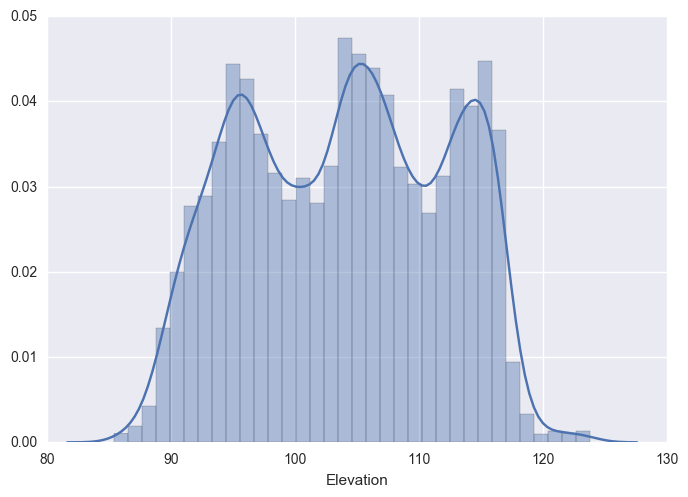

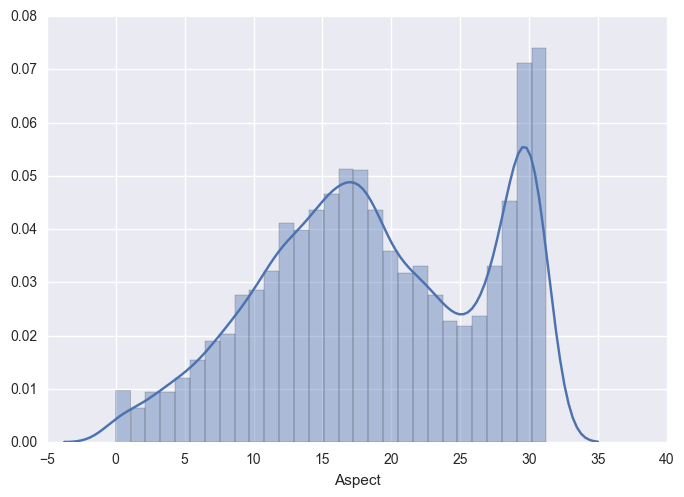

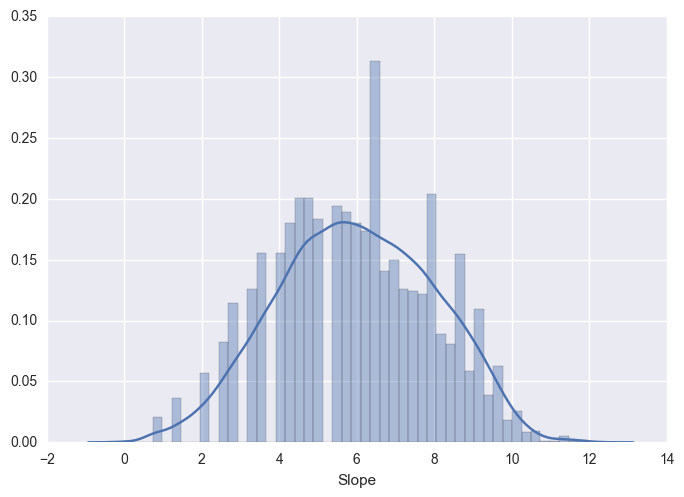

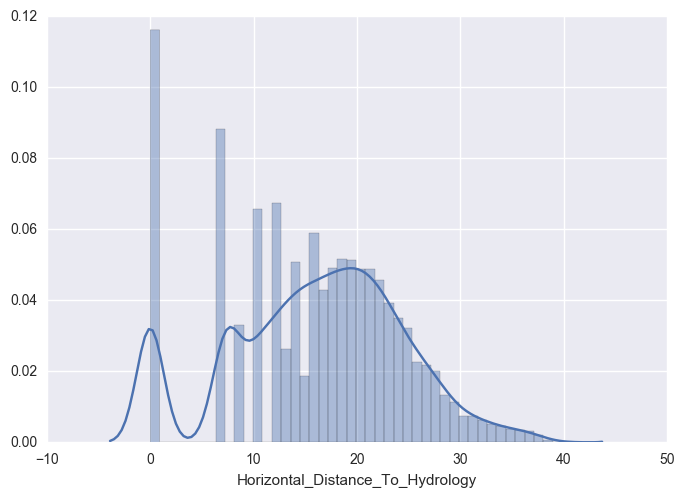

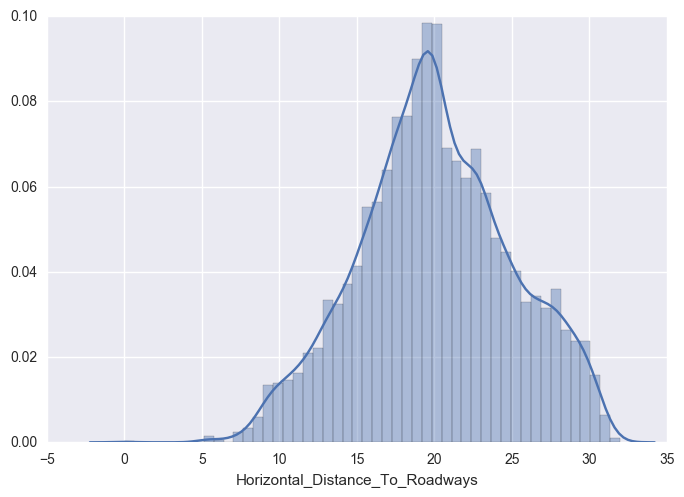

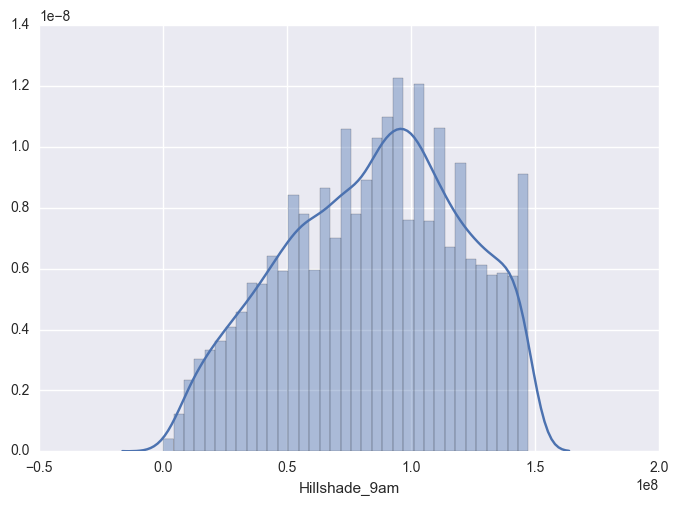

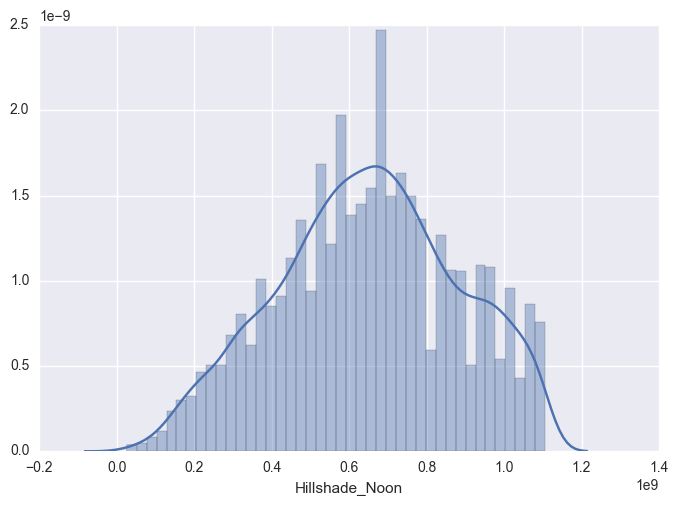

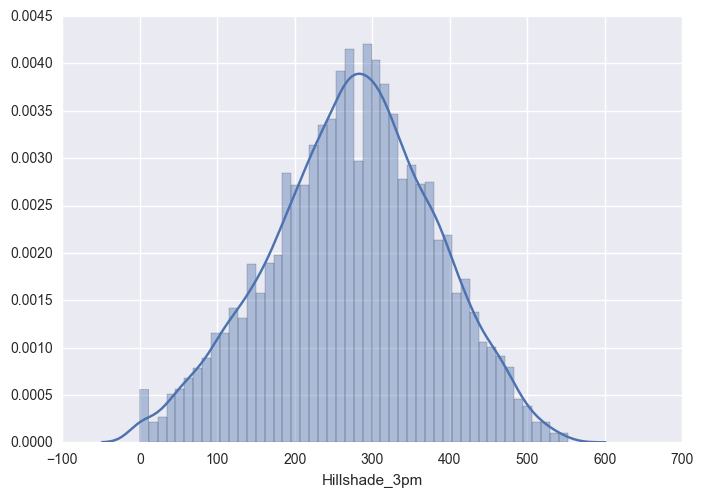

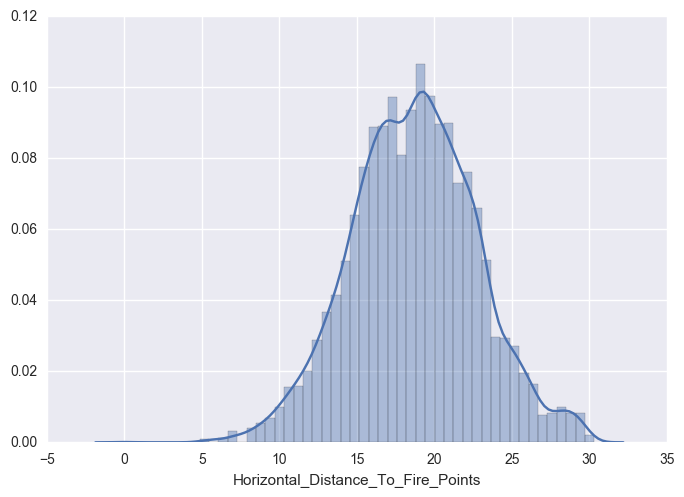

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in feat:
  sns.distplot(train_boxcox[i])
  plt.show()

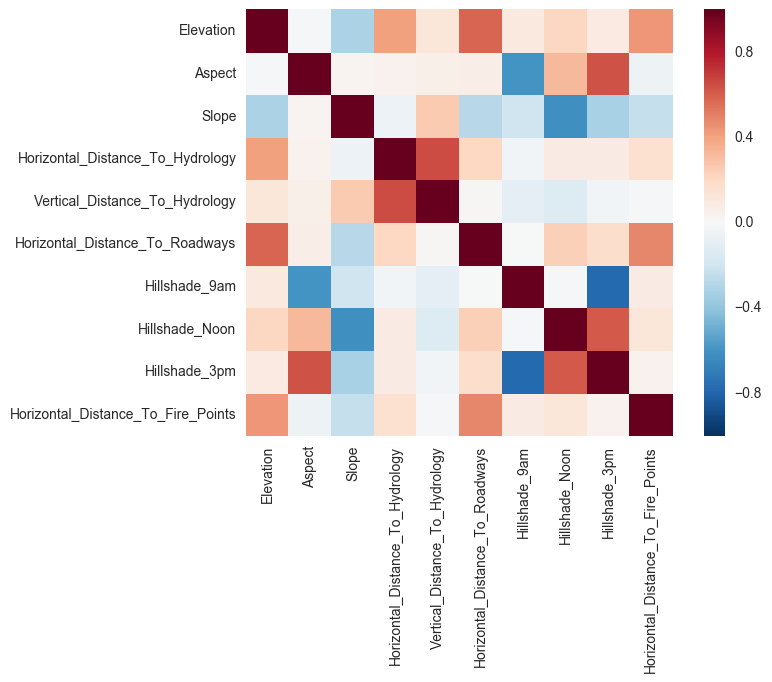

In [41]:
cor=train.ix[:,1:11].corr()
sns.heatmap(cor,vmax=1,square=True)
plt.show()

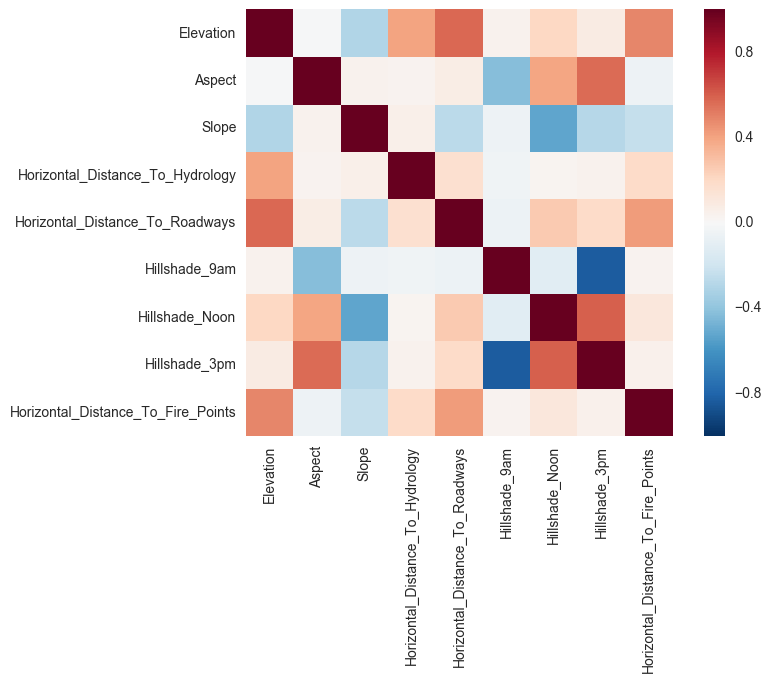

In [46]:
cor=train_boxcox.ix[:,0:9].corr()
sns.heatmap(cor,vmax=1,square=True)
plt.show()
#aspect hillshade 3pm
# slope hillshade noon
#hill shade 3pm and hill shade 9am
#hillshade 3pm and hillshade noon
#horizontal dist to hydro and hillshade noon
#aspect and hillshade 3pm

#correlation not affected much by boxcox transformation



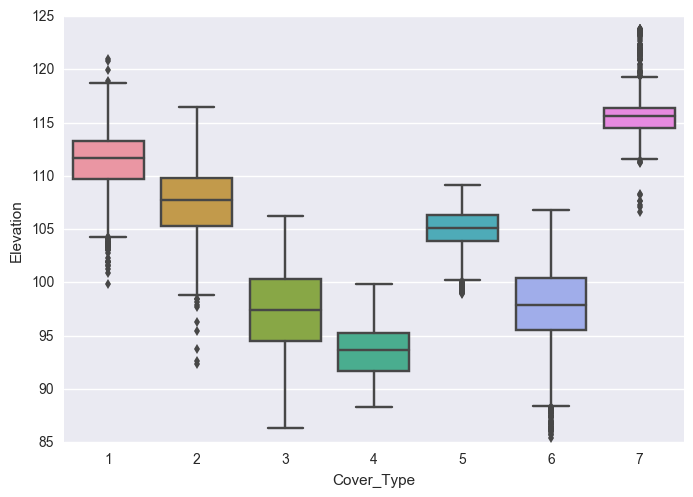

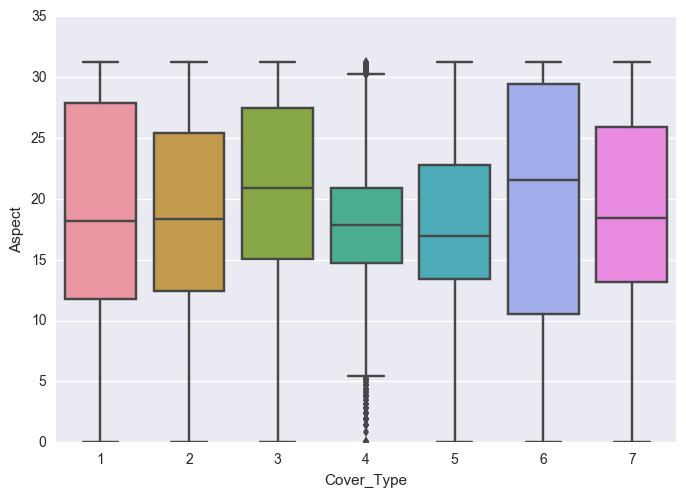

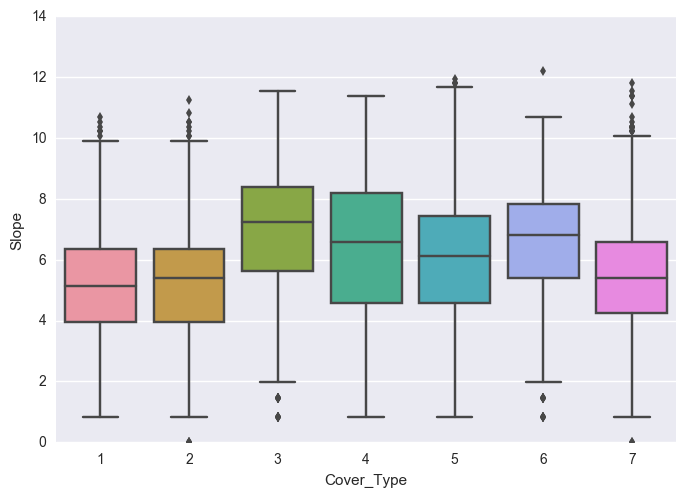

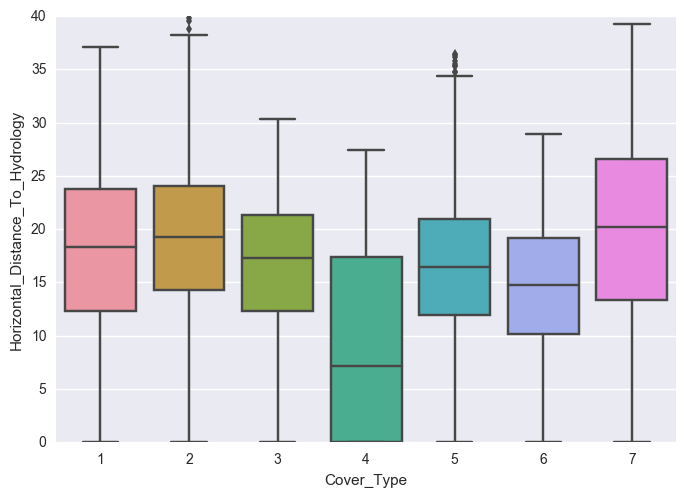

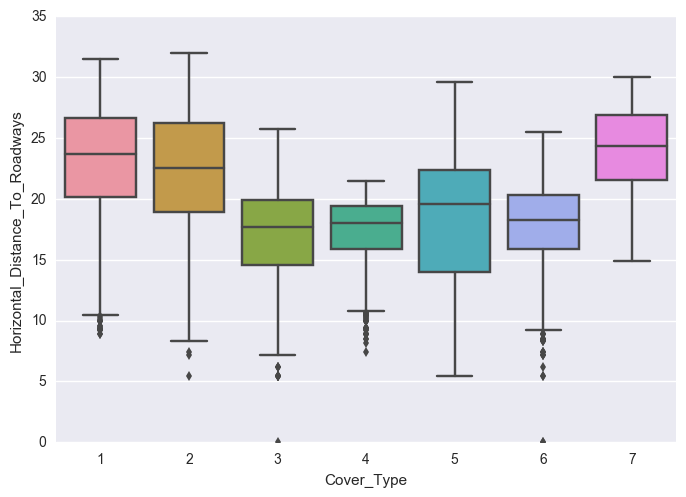

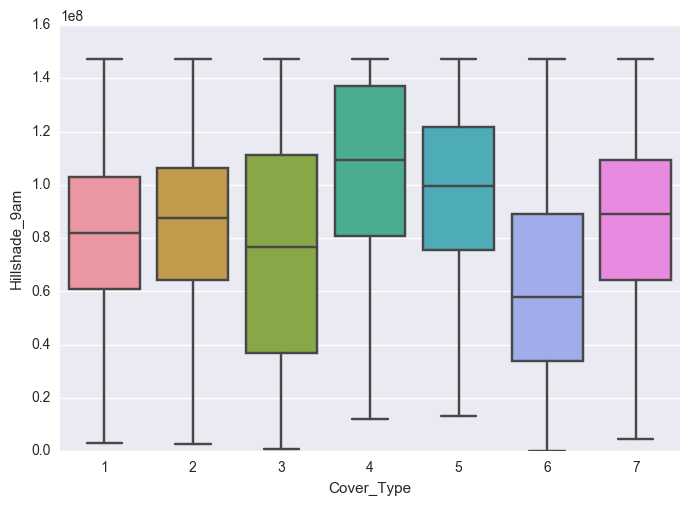

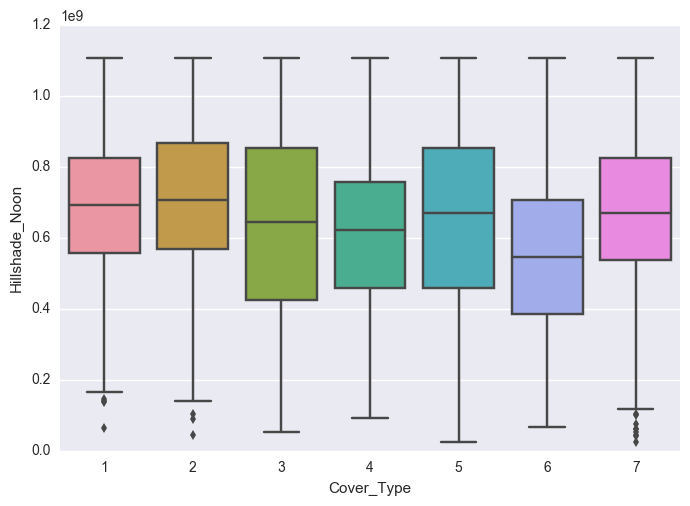

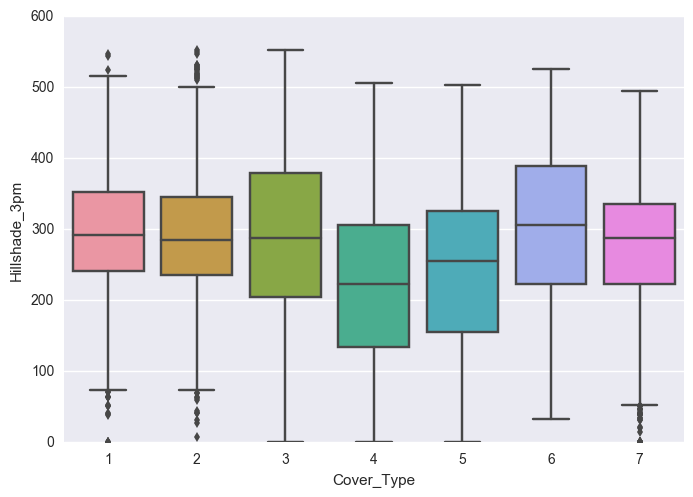

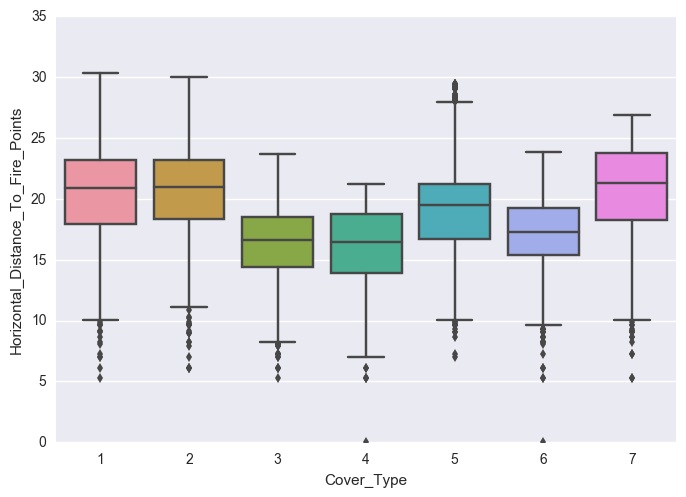

In [47]:
for name in feat:
     sns.boxplot(x="Cover_Type",y=name,data=train_boxcox)
     plt.show()

#outlier are more affected in hillshade 9am and horizontal distance to roadways
